In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [3]:
# Add 'overweight' column
df['overweight'] = np.where((df['weight'])/(((df['height'])/100)**2) > 25,1,0)

In [4]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

In [5]:
df_cat = pd.melt(df,id_vars='cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [6]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


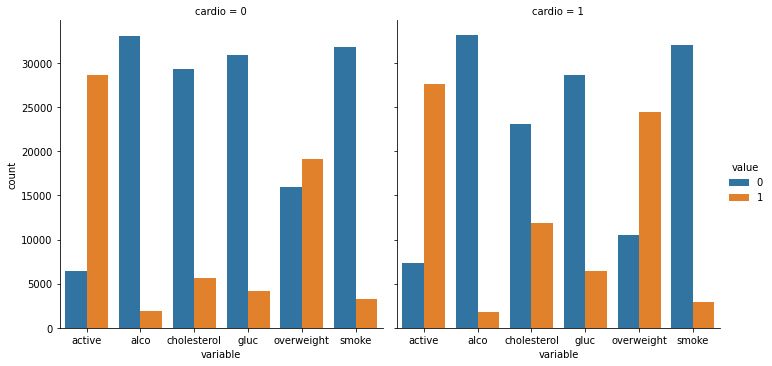

In [8]:
sns.catplot(data=df_cat,kind='count',x='variable',hue='value',col='cardio')